In [ ]:
from fim import apriori, fpgrowth

In [ ]:
# import dataset
df = pd.read_csv("/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features-cleaned-transformed.csv", skipinitialspace=True)

# Pattern Mining

In [ ]:
df = df.drop(["modality", "channels", "sample_width", "frame_rate", "frame_width"], axis=1)

In [ ]:
df = df.drop(["stft_max"], axis=1)

In [ ]:
np.unique(df['frame_count'], return_counts=True)

(array([140941, 142542, 144144, 145745, 145746, 147347, 147348, 148948,
        148949, 150550, 150551, 152152, 153753, 153754, 155355, 155356,
        156956, 156957, 158558, 158559, 160160, 161761, 161762, 163363,
        163364, 164964, 164965, 166566, 166567, 168168, 169769, 169770,
        171371, 171372, 172972, 172973, 174574, 174575, 176176, 177777,
        177778, 179379, 179380, 180980, 180981, 182582, 182583, 184184,
        185785, 185786, 187387, 187388, 188988, 188989, 190590, 190591,
        192192, 193793, 193794, 195395, 195396, 196996, 196997, 198598,
        198599, 200200, 201801, 201802, 203403, 203404, 205004, 205005,
        206606, 206607, 208208, 209809, 209810, 211411, 211412, 213012,
        213013, 214614, 214615, 216216, 217817, 217818, 219419, 219420,
        221020, 221021, 222622, 222623, 224224, 225825, 225826, 227427,
        227428, 229028, 229029, 230630, 230631, 232232, 233833, 233834,
        235435, 235436, 237036, 237037, 238638, 238639, 240240, 

In [ ]:
df["length_ms_bin"] = pd.qcut(df["length_ms"], 8, duplicates='drop')
df["frame_count_bin"] = pd.qcut(df["frame_count"], 19, duplicates='drop')
df["intensity_bin"] = pd.qcut(df["intensity"], 20, duplicates='drop')
df["zero_crossings_sum_bin"] = pd.qcut(df["zero_crossings_sum"], 20, duplicates='drop')
df["mfcc_mean_bin"] = pd.qcut(df["mfcc_mean"], 20, duplicates='drop')
df["mfcc_std_bin"] = pd.qcut(df["mfcc_std"], 20, duplicates='drop')
df["mfcc_min_bin"] = pd.qcut(df["mfcc_min"], 20, duplicates='drop')
df["mfcc_max_bin"] = pd.qcut(df["mfcc_max"], 20, duplicates='drop')
df["sc_mean_bin"] = pd.qcut(df["sc_mean"], 20, duplicates='drop')
df["sc_std_bin"] = pd.qcut(df["sc_std"], 20, duplicates='drop')
df["sc_min_bin"] = pd.qcut(df["sc_min"], 20, duplicates='drop')
df["sc_max_bin"] = pd.qcut(df["sc_max"], 20, duplicates='drop')
df["sc_kur_bin"] = pd.qcut(df["sc_kur"], 20, duplicates='drop')
df["sc_skew_bin"] = pd.qcut(df["sc_skew"], 20, duplicates='drop')
df["stft_mean_bin"] = pd.qcut(df["stft_mean"], 20, duplicates='drop')
df["stft_std_bin"] = pd.qcut(df["stft_std"], 20, duplicates='drop')
df["stft_min_bin"] = pd.qcut(df["stft_min"], 20, duplicates='drop')
df["stft_kur_bin"] = pd.qcut(df["stft_kur"], 20, duplicates='drop')
df["stft_skew_bin"] = pd.qcut(df["stft_skew"], 20, duplicates='drop')
df["mean_bin"] = pd.qcut(df["mean"], 20, duplicates='drop')
df["std_bin"] = pd.qcut(df["std"], 20, duplicates='drop')
df["min_bin"] = pd.qcut(df["min"], 20, duplicates='drop')
df["max_bin"] = pd.qcut(df["max"], 20, duplicates='drop')
df["kur_bin"] = pd.qcut(df["kur"], 20, duplicates='drop')
df["skew_bin"] = pd.qcut(df["skew"], 20, duplicates='drop')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   vocal_channel           2417 non-null   int64   
 1   emotion                 2417 non-null   int64   
 2   emotional_intensity     2417 non-null   int64   
 3   statement               2417 non-null   int64   
 4   repetition              2417 non-null   int64   
 5   actor                   2417 non-null   float64 
 6   sex                     2417 non-null   int64   
 7   length_ms               2417 non-null   int64   
 8   frame_count             2417 non-null   int64   
 9   intensity               2417 non-null   float64 
 10  zero_crossings_sum      2417 non-null   int64   
 11  mfcc_mean               2417 non-null   float64 
 12  mfcc_std                2417 non-null   float64 
 13  mfcc_min                2417 non-null   float64 
 14  mfcc_max                

In [ ]:
df["zero_crossings_sum_bin"] = df["zero_crossings_sum_bin"].astype(str) + "_zero_crossings_sum"
df["mfcc_mean_bin"] = df["mfcc_mean_bin"].astype(str) + "_mfcc_mean"
df["mfcc_std_bin"] = df["mfcc_std_bin"].astype(str) + "_mfcc_std"
df["mfcc_min_bin"] = df["mfcc_min_bin"].astype(str) + "_mfcc_min"
df["mfcc_max_bin"] = df["mfcc_max_bin"].astype(str) + "_mfcc_max"
df["sc_mean_bin"] = df["sc_mean_bin"].astype(str) + "_sc_mean"
df["sc_std_bin"] = df["sc_std_bin"].astype(str) + "_sc_std"
df["sc_min_bin"] = df["sc_min_bin"].astype(str) + "_sc_min"
df["sc_max_bin"] = df["sc_max_bin"].astype(str) + "_sc_max"
df["sc_kur_bin"] = df["sc_kur_bin"].astype(str) + "_sc_kur"
df["sc_skew_bin"] = df["sc_skew_bin"].astype(str) + "_sc_skew"
df["stft_mean_bin"] = df["stft_mean_bin"].astype(str) + "_stft_mean"
df["stft_std_bin"] = df["stft_std_bin"].astype(str) + "_stft_std"
df["stft_min_bin"] = df["stft_min_bin"].astype(str) + "_stft_min"
df["stft_kur_bin"] = df["stft_kur_bin"].astype(str) + "_stft_kur"
df["stft_skew_bin"] = df["stft_skew_bin"].astype(str) + "_stft_skew"
df["mean_bin"] = df["mean_bin"].astype(str) + "_mean"
df["std_bin"] = df["std_bin"].astype(str) + "_std"
df["min_bin"] = df["min_bin"].astype(str) + "_min"
df["max_bin"] = df["max_bin"].astype(str) + "_max"
df["kur_bin"] = df["kur_bin"].astype(str) + "_kur"
df["skew_bin"] = df["skew_bin"].astype(str) + "_skew"

In [ ]:
df["emotion"] = df["emotion"].astype(str) + "_emotion"
df["emotional_intensity"] = df["emotional_intensity"].astype(str) + "_emotional_intensity"
df["statement"] = df["statement"].astype(str) + "_statement"
df["repetition"] = df["repetition"].astype(str) + "_repetition"
df["actor"] = df["actor"].astype(str) + "_actor"
df["sex"] = df["sex"].astype(str) + "_sex"

In [ ]:
df["vocal_channel"] = df["vocal_channel"].astype(str) + "_vocal_channel"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   vocal_channel           2417 non-null   object  
 1   emotion                 2417 non-null   object  
 2   emotional_intensity     2417 non-null   object  
 3   statement               2417 non-null   object  
 4   repetition              2417 non-null   object  
 5   actor                   2417 non-null   object  
 6   sex                     2417 non-null   object  
 7   length_ms_bin           2417 non-null   category
 8   frame_count_bin         2417 non-null   category
 9   intensity_bin           2417 non-null   category
 10  zero_crossings_sum_bin  2417 non-null   object  
 11  mfcc_mean_bin           2417 non-null   object  
 12  mfcc_std_bin            2417 non-null   object  
 13  mfcc_min_bin            2417 non-null   object  
 14  mfcc_max_bin            

In [ ]:
df = df.drop(["length_ms", "frame_count", "intensity", "zero_crossings_sum", "mfcc_mean",
             "mfcc_std", "mfcc_min", "mfcc_max", "sc_mean", "sc_std", "sc_min", "sc_max",
             "sc_kur", "sc_skew", "stft_mean", "stft_std", "stft_min", "stft_kur", "stft_skew",
             "mean", "std", "min", "max", "kur", "skew"])

In [ ]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,length_ms_bin,frame_count_bin,intensity_bin,...,stft_std_bin,stft_min_bin,stft_kur_bin,stft_skew_bin,mean_bin,std_bin,min_bin,max_bin,kur_bin,skew_bin
0,1_vocal_channel,3_emotion,0_emotional_intensity,0_statement,1_repetition,2.0_actor,0_sex,"(3604.0, 3770.0]","(177777.0, 179380.0]","(-37.361, -36.558]",...,"(0.334, 0.337]_stft_std","(-0.001, 6.18e-05]_stft_min","(-1.246, -1.214]_stft_kur","(0.378, 0.436]_stft_skew","(3.17e-07, 5.49e-07]_mean","(0.0139, 0.0152]_std","(-0.131, -0.117]_min","(0.125, 0.143]_max","(9.206, 9.834]_kur","(0.263, 0.315]_skew"
1,1_vocal_channel,0_emotion,0_emotional_intensity,0_statement,0_repetition,16.0_actor,0_sex,"(3770.0, 4004.0]","(184184.0, 188989.0]","(-34.76, -33.593]",...,"(0.352, 0.355]_stft_std","(-0.001, 6.18e-05]_stft_min","(-1.391, -1.37]_stft_kur","(0.249, 0.291]_stft_skew","(-9.8e-08, 3.01e-08]_mean","(0.0192, 0.0222]_std","(-0.381, -0.296]_min","(0.256, 0.321]_max","(18.971, 22.395]_kur","(0.263, 0.315]_skew"
2,0_vocal_channel,4_emotion,1_emotional_intensity,0_statement,1_repetition,16.0_actor,0_sex,"(4538.0, 4805.0]","(221021.0, 225826.0]","(-32.367, -31.166]",...,"(0.352, 0.355]_stft_std","(-0.001, 6.18e-05]_stft_min","(-1.246, -1.214]_stft_kur","(0.436, 0.523]_stft_skew","(2.14e-06, 4.5e-06]_mean","(0.0222, 0.0262]_std","(-0.151, -0.131]_min","(0.163, 0.19]_max","(4.688, 5.272]_kur","(0.263, 0.315]_skew"
3,1_vocal_channel,7_emotion,0_emotional_intensity,1_statement,0_repetition,14.0_actor,0_sex,"(3604.0, 3770.0]","(172973.0, 177777.0]","(-51.128, -47.832]",...,"(0.359, 0.365]_stft_std","(-0.001, 6.18e-05]_stft_min","(-1.461, -1.434]_stft_kur","(0.249, 0.291]_stft_skew","(1.66e-07, 3.17e-07]_mean","(0.00264, 0.00369]_std","(-0.0304, -0.0217]_min","(0.0218, 0.0304]_max","(12.16, 13.135]_kur","(-0.111, -0.0542]_skew"
4,0_vocal_channel,4_emotion,1_emotional_intensity,0_statement,1_repetition,2.0_actor,0_sex,"(4271.0, 4538.0]","(206606.0, 211411.0]","(-32.367, -31.166]",...,"(0.349, 0.352]_stft_std","(-0.001, 6.18e-05]_stft_min","(-1.37, -1.354]_stft_kur","(0.291, 0.334]_stft_skew","(8.37e-07, 1.27e-06]_mean","(0.0262, 0.0298]_std","(-0.203, -0.175]_min","(0.225, 0.256]_max","(7.184, 7.828]_kur","(0.376, 0.465]_skew"


In [ ]:
X = df.values.tolist()

## Frequent pattern extraction

In [ ]:
supp = 15  # 20%
zmin = 3  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
ap = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

In [ ]:
ap.style.set_properties(subset=['frequent_itemset'], **{'width': '300px'})

,frequent_itemset,support
0,"('0_vocal_channel', '(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min')",17.170046
1,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '1_emotional_intensity')",17.790650
2,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex')",30.450972
3,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '0_statement')",15.018618
4,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '0_repetition')",15.184113
5,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '1_repetition')",15.266860
6,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '1_statement')",15.432354
7,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '0_emotional_intensity')",17.087298
8,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '1_vocal_channel')",18.494001
9,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_statement')",20.521307


In [ ]:
supp = 15  # 20%
zmin = 3  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"]).style.set_properties(subset=['frequent_itemset'], **{'width': '300px'})

,frequent_itemset,support
0,"('1_sex', '0_emotional_intensity', '1_vocal_channel')",15.763343
1,"('1_statement', '0_emotional_intensity', '1_vocal_channel')",15.763343
2,"('1_repetition', '0_emotional_intensity', '1_vocal_channel')",15.721969
3,"('0_repetition', '0_emotional_intensity', '1_vocal_channel')",15.680596
4,"('0_statement', '0_emotional_intensity', '1_vocal_channel')",15.639222
5,"('0_sex', '0_emotional_intensity', '1_vocal_channel')",15.639222
6,"('(-0.001, 6.18e-05]_stft_min', '0_sex', '1_vocal_channel')",18.990484
7,"('(-0.001, 6.18e-05]_stft_min', '0_sex', '0_emotional_intensity')",19.280099
8,"('(-0.001, 6.18e-05]_stft_min', '0_sex', '1_statement')",17.045925
9,"('(-0.001, 6.18e-05]_stft_min', '0_sex', '1_repetition')",16.714936


## Closed itemsets extraction

In [ ]:
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
ap = pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

In [ ]:
ap.style.set_properties(subset=['closed_itemset'], **{'width': '300px'})

,closed_itemset,support
0,"(0, '0_statement')",20.397187
1,"(0, '0_repetition')",20.562681
2,"(0, '1_repetition')",20.852296
3,"(0, '1_statement')",21.017791
4,"(0, '1_sex')",21.472900
5,"(0, '0_emotional_intensity')",22.383120
6,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min')",41.704592
7,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex')",30.450972
8,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_statement')",20.521307
9,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_repetition')",21.059164


In [ ]:
supp = 15  # 20%
zmin = 3  # minimum number of items per item set

itemsets = fpgrowth(X, target="c", supp=supp, zmin=zmin, report="S")
fp = pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

In [ ]:
fp.style.set_properties(subset=['closed_itemset'], **{'width': '300px'})

,closed_itemset,support
0,"(0, '(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min')",17.170046
1,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '1_emotional_intensity')",17.790650
2,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_statement')",15.018618
3,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_repetition')",15.184113
4,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '1_repetition')",15.266860
5,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '1_statement')",15.432354
6,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_emotional_intensity')",17.087298
7,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', 1)",18.494001
8,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex')",30.450972
9,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_statement')",20.521307


## Maximal itemsets extraction

In [ ]:
supp = 15  # 20%
zmin = 3  # minimum number of items per item set

itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
ap = pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

In [ ]:
ap.style.set_properties(subset=['maximal_itemset'], **{'width': '300px'})

,maximal_itemset,support
0,"(0, '(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min')",17.170046
1,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '1_emotional_intensity')",17.790650
2,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '0_statement')",15.018618
3,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '0_repetition')",15.184113
4,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '1_repetition')",15.266860
5,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '1_statement')",15.432354
6,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', '0_emotional_intensity')",17.087298
7,"('(-0.001, 6.18e-05]_stft_min', '(-0.001, 558.087]_sc_min', '0_sex', 1)",18.494001
8,"('0_sex', '0_emotional_intensity', 1)",15.639222
9,"('0_statement', '0_emotional_intensity', 1)",15.639222


In [ ]:
supp = 15  # 20%
zmin = 3  # minimum number of items per item set

itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")
fp = pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

In [ ]:
fp.style.set_properties(subset=['maximal_itemset'], **{'width': '300px'})

,maximal_itemset,support
0,"(0, '(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min')",17.170046
1,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '1_emotional_intensity')",17.790650
2,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_statement')",15.018618
3,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_repetition')",15.184113
4,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '1_repetition')",15.266860
5,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '1_statement')",15.432354
6,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_emotional_intensity')",17.087298
7,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', 1)",18.494001
8,"('0_sex', '0_emotional_intensity', 1)",15.639222
9,"('0_statement', '0_emotional_intensity', 1)",15.639222


## Support plots

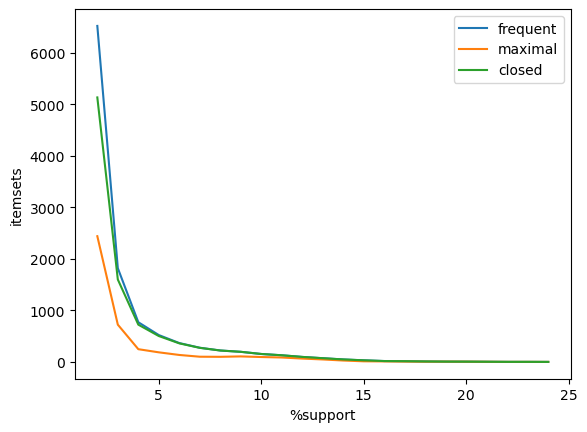

In [ ]:
len_freq_it = []
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    freq_itemsets = apriori(X, target="s", supp=i, zmin=zmin)
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_freq_it.append(len(freq_itemsets))
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_freq_it, label="frequent")
plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

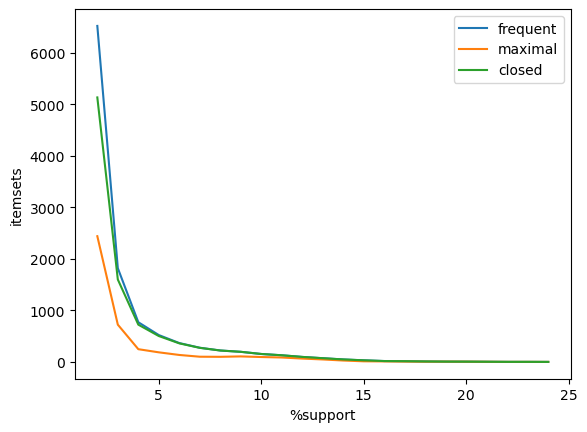

In [ ]:
len_freq_it = []
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    freq_itemsets = fpgrowth(X, target="s", supp=i, zmin=zmin)
    max_itemsets = fpgrowth(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = fpgrowth(X, target="c", supp=i, zmin=zmin)
    len_freq_it.append(len(freq_itemsets))
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_freq_it, label="frequent")
plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

In [ ]:
X[0]

['1_vocal_channel',
 '3_emotion',
 '0_emotional_intensity',
 '0_statement',
 '1_repetition',
 '2.0_actor',
 '0_sex',
 Interval(3604.0, 3770.0, closed='right'),
 Interval(177777.0, 179380.0, closed='right'),
 Interval(-37.361, -36.558, closed='right'),
 '(16700.6, 17660.2]_zero_crossings_sum',
 '(-33.539, -32.612]_mfcc_mean',
 '(134.26, 136.55]_mfcc_std',
 '(-761.177, -748.625]_mfcc_min',
 '(168.97, 174.721]_mfcc_max',
 '(5776.318, 5934.901]_sc_mean',
 '(3292.268, 3359.02]_sc_std',
 '(-0.001, 558.087]_sc_min',
 '(13459.387, 17477.54]_sc_max',
 '(-1.151, -1.079]_sc_kur',
 '(0.208, 0.251]_sc_skew',
 '(0.403, 0.415]_stft_mean',
 '(0.334, 0.337]_stft_std',
 '(-0.001, 6.18e-05]_stft_min',
 '(-1.246, -1.214]_stft_kur',
 '(0.378, 0.436]_stft_skew',
 '(3.17e-07, 5.49e-07]_mean',
 '(0.0139, 0.0152]_std',
 '(-0.131, -0.117]_min',
 '(0.125, 0.143]_max',
 '(9.206, 9.834]_kur',
 '(0.263, 0.315]_skew']

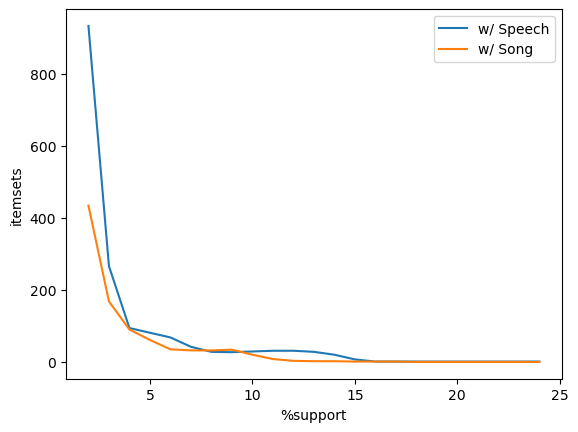

In [ ]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
#     print(max_itemsets)
    filter_1.append(len([item for item in max_itemsets if "1_vocal_channel" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "0_vocal_channel" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ Speech")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Song")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

## Rules Extraction

In [ ]:
conf = 60
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
# rules_df.sort_values(by="lift", axis=0, ascending=False)
rules_df.style.set_properties(subset=['antecedent'], **{'width': '300px'})

,consequent,antecedent,abs_support,%_support,confidence,lift
0,0_sex,"('0_vocal_channel', '(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min')",289,11.956971,0.696386,1.417998
1,"(-0.001, 6.18e-05]_stft_min","('0_vocal_channel', '(-0.001, 558.087]_sc_min')",415,17.170046,0.922222,2.048723
2,"(-0.001, 558.087]_sc_min","('0_vocal_channel', '(-0.001, 6.18e-05]_stft_min')",415,17.170046,0.862786,1.916685
3,0_sex,"('0_vocal_channel', '(-0.001, 558.087]_sc_min')",292,12.081092,0.648889,1.321284
4,"(-0.001, 558.087]_sc_min","('0_vocal_channel', '0_sex')",292,12.081092,0.605809,1.345809
5,0_sex,"('0_vocal_channel', '(-0.001, 6.18e-05]_stft_min')",354,14.646256,0.735967,1.498594
6,"(-0.001, 6.18e-05]_stft_min","('0_vocal_channel', '0_sex')",354,14.646256,0.734440,1.631563
7,0_sex,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '1_emotional_intensity')",323,13.363674,0.751163,1.529537
8,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '1_emotional_intensity')",430,17.790650,0.892116,1.981843
9,"(-0.001, 558.087]_sc_min","('(-0.001, 6.18e-05]_stft_min', '1_emotional_intensity')",430,17.790650,0.940919,2.090259


In [ ]:
conf = 60
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False).style.set_properties(subset=['antecedent'], **{'width': '300px'})

,consequent,antecedent,abs_support,%_support,confidence,lift
54,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_sex', '0_emotional_intensity')",413,17.087298,0.992788,2.205487
58,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_sex', '1_statement')",373,15.432354,0.992021,2.203783
66,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_sex', '0_repetition')",367,15.184113,0.991892,2.203495
73,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_sex')",736,30.450972,0.987919,2.194670
50,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_sex', '1_vocal_channel')",447,18.494001,0.986755,2.192083
62,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_sex', '1_repetition')",369,15.266860,0.984000,2.185963
70,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_sex', '0_statement')",363,15.018618,0.983740,2.185385
37,"(-0.001, 558.087]_sc_min","('(-0.001, 6.18e-05]_stft_min', '1_vocal_channel')",593,24.534547,0.976936,2.170270
51,"(-0.001, 558.087]_sc_min","('(-0.001, 6.18e-05]_stft_min', '0_sex', '1_vocal_channel')",447,18.494001,0.973856,2.163429
38,"(-0.001, 6.18e-05]_stft_min","('(-0.001, 558.087]_sc_min', '0_emotional_intensity')",578,23.913943,0.953795,2.118863


## Optimization of Confidence and Support for Rules

In [ ]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

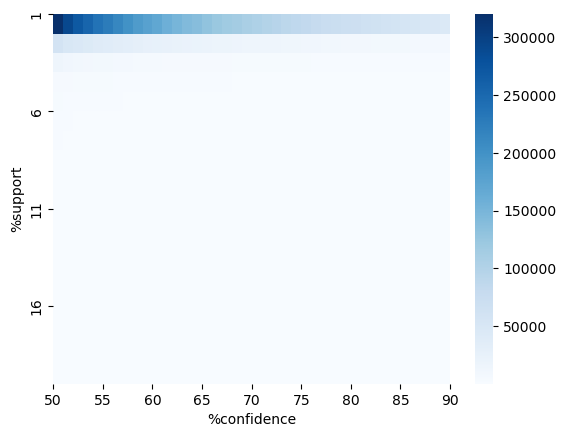

In [ ]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

## Target Variable Prediction

In [ ]:
rules_df[rules_df["consequent"] == "1_vocal_channel"].sort_values(by="lift", axis=0, ascending=False).style.set_properties(subset=['antecedent'], **{'width': '300px'})

,consequent,antecedent,abs_support,%_support,confidence,lift
14,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_repetition')",225,9.309061,0.613079,1.046477
63,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '0_sex', '0_emotional_intensity')",255,10.550269,0.612981,1.046310
26,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_emotional_intensity')",253,10.467522,0.612591,1.045644
60,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '0_sex', '1_statement')",230,9.515929,0.611702,1.044127
54,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '0_sex', '0_repetition')",226,9.350434,0.610811,1.042606
22,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '1_statement')",227,9.391808,0.608579,1.038796
67,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '0_sex')",453,18.742242,0.608054,1.037900
30,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex')",447,18.494001,0.607337,1.036676
10,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '(-0.001, 6.18e-05]_stft_min', '0_sex', '0_statement')",220,9.102193,0.606061,1.034498
57,1_vocal_channel,"('(-0.001, 558.087]_sc_min', '0_sex', '1_repetition')",227,9.391808,0.605333,1.033256


In [ ]:
print("to_predict:", [r for r in rules if r[0] == "1_vocal_channel"][0][0])
print("how?", [r for r in rules if r[0] == "1_vocal_channel"][0][1])